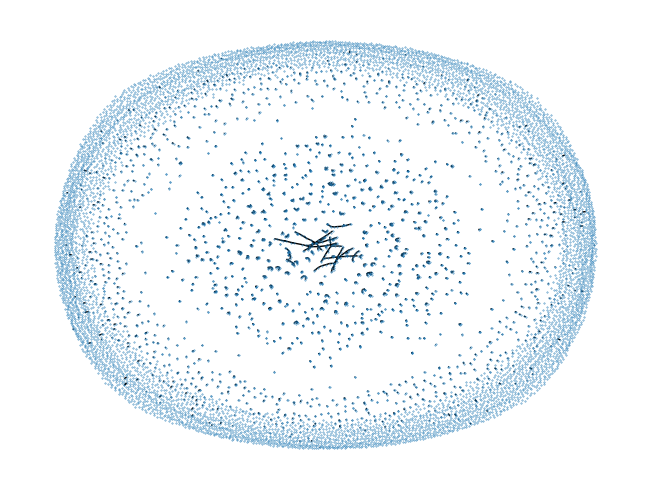

In [87]:
import networkx as nx

# 参数
n = 10000 
avg_degree = 0.5  

p = avg_degree / (n - 1)

G = nx.erdos_renyi_graph(n, p)
nx.draw(G, node_size=0.1)

In [55]:
# 计算网络实际的连通分量大小分布
from collections import Counter
components = nx.connected_components(G)
component_sizes = [len(component) for component in components]
component_sizes_counter = Counter(component_sizes)
num_of_components = len(component_sizes)
component_sizes_density = {size: count / num_of_components for size, count in component_sizes_counter.items()}
print("连通分量大小和对应概率密度：")
for size in sorted(component_sizes_density.keys()):
    prob_density = component_sizes_density[size]
    print(f"Size {size}: Probability Density {prob_density:.4f}")

连通分量大小和对应概率密度：
Size 1: Probability Density 0.8125
Size 2: Probability Density 0.1190
Size 3: Probability Density 0.0369
Size 4: Probability Density 0.0158
Size 5: Probability Density 0.0068
Size 6: Probability Density 0.0041
Size 7: Probability Density 0.0021
Size 8: Probability Density 0.0012
Size 9: Probability Density 0.0001
Size 10: Probability Density 0.0003
Size 11: Probability Density 0.0004
Size 12: Probability Density 0.0003
Size 14: Probability Density 0.0003
Size 15: Probability Density 0.0001
Size 19: Probability Density 0.0001


In [40]:
real_degrees = [degree for _, degree in G.degree()]
max(real_degrees)

5

In [41]:
import sympy as sp
import math
max_degree = max(real_degrees)
freq = [real_degrees.count(d)/n for d in range(max_degree+1)]
x = sp.symbols('x')
G0 = sum((0.5 ** k)*(math.exp(-0.5))/ math.factorial(k) * x**k for k in range(max_degree+1))
G0_diff = sp.diff(G0, x)
G0_diff_1 = G0_diff.subs(x, 1)
G1 = G0_diff / G0_diff_1
print(max_degree)
print(G0)
print(G1)

5
0.000157950692633498*x**5 + 0.00157950692633498*x**4 + 0.0126360554106799*x**3 + 0.0758163324640792*x**2 + 0.303265329856317*x + 0.606530659712633
0.00157977883096367*x**4 + 0.0126382306477093*x**3 + 0.0758293838862559*x**2 + 0.303317535545024*x + 0.606635071090047


In [42]:
sp.Poly(G1, x).degree()
H1 = x
while sp.Poly(H1, x).degree() < 14:
    H1 = G1.subs(x, H1)
H1 = sp.expand(H1)
print(H1)

9.8396907644155e-15*x**16 + 3.14870104461296e-13*x**15 + 5.66766188030333e-12*x**14 + 7.30498642350207e-11*x**13 + 7.85364758052587e-10*x**12 + 7.24138266240088e-9*x**11 + 5.83353545133354e-8*x**10 + 4.11804755340333e-7*x**9 + 2.7195637920674e-6*x**8 + 1.64475321059927e-5*x**7 + 9.1192180899835e-5*x**6 + 0.000451181977342998*x**5 + 0.00237968728641948*x**4 + 0.0103566585224561*x**3 + 0.0405552196497213*x**2 + 0.12456723858032*x + 0.821579176461042


In [48]:
H0 = x * G0.subs(x, H1)
H0 = sp.expand(H0)
# 计算 H_0 和其一阶导数的函数
def compute_H_0_and_derivative(G0, H1, max_size):

    # 初始化 den 和 P_list
    den = 1
    P_list = []
    
    # 计算概率列表
    for i in range(1,max_size+1):
        H0_diff = H0
        for _ in range(i):
            H0_diff = sp.diff(H0_diff, x)
        H0_diff_0 = H0_diff.subs(x, 0)
        Ps = 1 / den * H0_diff_0
        P_list.append(Ps)
        den *= (i+1)
    
    return P_list

# 定义符号变量和参数
x = sp.symbols('x')
max_size = 19

# 计算 H_0 和 P_list
P_list = compute_H_0_and_derivative(G0, H1, max_size)
print(P_list)

[0.914648801252666, 0.0569639552236556, 0.0203182574179147, 0.00592674885691135, 0.00160705223597218, 0.000391432507957791, 9.86554114457856e-5, 2.37064904155531e-5, 5.56361210825724e-6, 1.28378016456513e-6, 2.93365535675509e-7, 6.60501092045525e-8, 1.47139853687697e-8, 3.24347824443862e-9, 7.07037337856078e-10, 1.52292832185323e-10, 3.24208531335799e-11, 6.82148005334029e-12, 1.41874099698266e-12]


In [66]:
theoretical_density = {index + 1: value for index, value in enumerate(P_list)}
print(theoretical_density)

{1: 0.914648801252666, 2: 0.0569639552236556, 3: 0.0203182574179147, 4: 0.00592674885691135, 5: 0.00160705223597218, 6: 0.000391432507957791, 7: 9.86554114457856e-5, 8: 2.37064904155531e-5, 9: 5.56361210825724e-6, 10: 1.28378016456513e-6, 11: 2.93365535675509e-7, 12: 6.60501092045525e-8, 13: 1.47139853687697e-8, 14: 3.24347824443862e-9, 15: 7.07037337856078e-10, 16: 1.52292832185323e-10, 17: 3.24208531335799e-11, 18: 6.82148005334029e-12, 19: 1.41874099698266e-12}


In [67]:
for size, prob in theoretical_density.items():
    if size in component_sizes_density:
        component_sizes_density[size] = component_sizes_density[size]
    else:
        component_sizes_density[size] = 0
component_sizes_density = dict(sorted(component_sizes_density.items(), key=lambda x: x[0]))

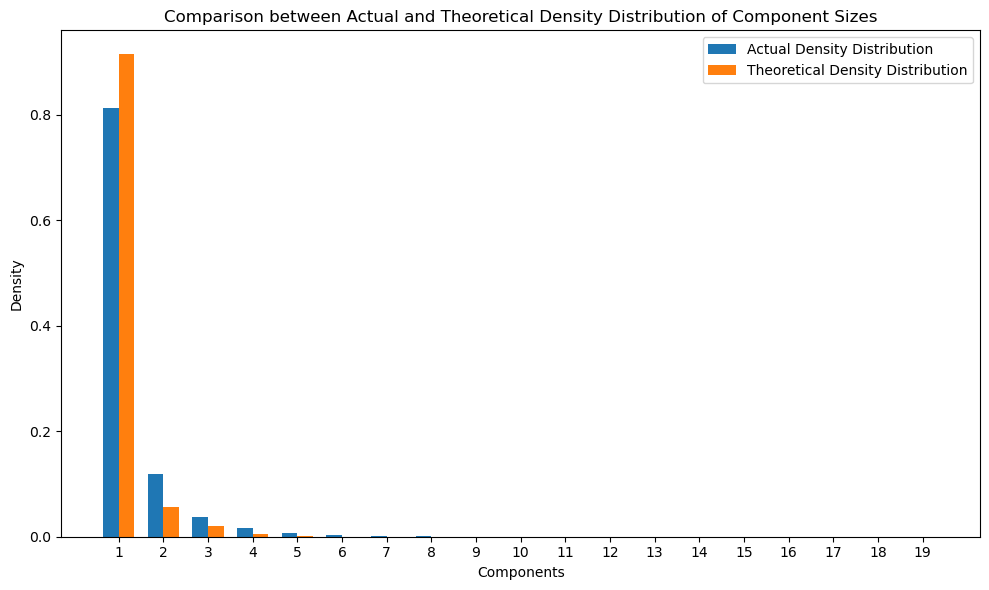

In [70]:
component_keys = list(component_sizes_density.keys())
component_values = list(component_sizes_density.values())
theoretical_values = [theoretical_density[key] for key in component_keys]

# 设置图形大小
plt.figure(figsize=(10, 6))

# 绘制条形图
bar_width = 0.35
index = range(len(component_keys))
plt.bar(index, component_values, bar_width, label='Actual Density Distribution')
plt.bar([i + bar_width for i in index], theoretical_values, bar_width, label='Theoretical Density Distribution')

# 添加标签和标题
plt.xlabel('Components')
plt.ylabel('Density')
plt.title('Comparison between Actual and Theoretical Density Distribution of Component Sizes')
plt.xticks([i + bar_width / 2 for i in index], component_keys)
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

In [13]:
G1_prime = sp.diff(G1, x)
G1_prime_1 = G1_prime.subs(x, 1)
print(G0_diff_1)
print(G1_prime_1)

0.499913942185022
0.499210110584518


In [14]:
from scipy.optimize import fsolve

# 定义方程
def equation(S, T):
    return 1 + 0.5 * (S - 1) - ((1 - T * G1_prime_1) / (1 - T * G1_prime_1 + T * G0_diff_1))

# 初始猜测值
initial_guess = 0.5

# 求解方程
T_values = np.linspace(0.01, 1, 100)
S_values = [fsolve(equation, initial_guess, args=(T,))[0] for T in T_values]

# 绘制关系图
plt.plot(T_values, S_values)
plt.xlabel('T')
plt.ylabel('S')
plt.title('S vs. T')
plt.grid(True)
plt.show()

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

error: Result from function call is not a proper array of floats.

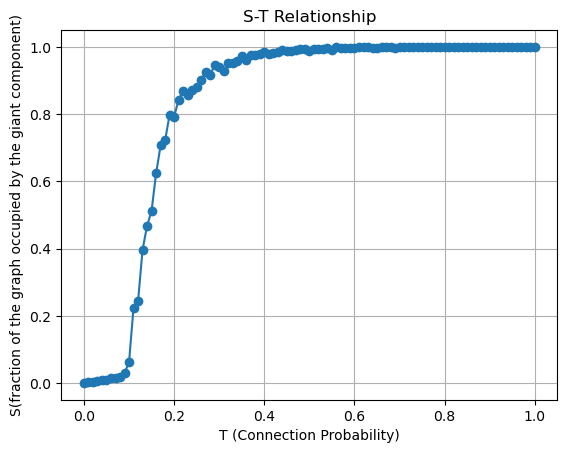

In [84]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def generate_poisson_network(size, mean_degree):
    G = nx.erdos_renyi_graph(size, mean_degree / size)
    return G

def compute_largest_connected_component_ratio(G):
    largest_cc = max(nx.connected_components(G), key=len)
    return len(largest_cc) / len(G)

T_values = np.linspace(0, 1, 101)

ratios = []

for T in T_values:
    ratio_sum = 0
    
    G = generate_poisson_network(1000, 10)  
    for (u, v) in G.edges():
        if np.random.rand() > T:
            G.remove_edge(u, v)
    ratios.append(compute_largest_connected_component_ratio(G))

plt.plot(T_values, ratios, marker='o')
plt.xlabel('T (Connection Probability)')
plt.ylabel('S(fraction of the graph occupied by the giant component)')
plt.title('S-T Relationship')
plt.grid(True)
plt.show()

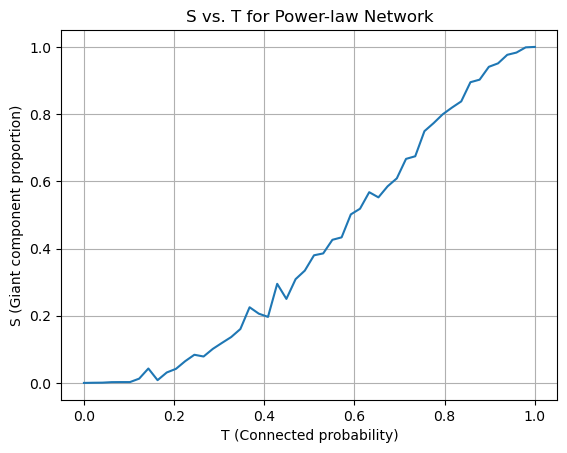

In [93]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def generate_powerlaw_network(N, alpha):
    min_degree = 2
    max_degree = int(np.sqrt(N))
    degree_seq = np.random.zipf(alpha, N)
    degree_seq = np.clip(degree_seq, min_degree, max_degree)
    
    if sum(degree_seq) % 2 != 0:
        degree_seq[np.random.randint(0, N)] += 1
    
    G = nx.configuration_model(degree_seq)
    G = nx.Graph(G)  # Remove parallel edges
    
    return G

def giant_component_size(G):

    component_sizes = [len(component) for component in nx.connected_components(G)]
    
    return max(component_sizes) / len(G)

def simulate_percolation(N, alpha, T_values):
    giant_component_sizes = []
    
    for T in T_values:
        giant_component_sizes_T = []

        G = generate_powerlaw_network(N, alpha)
        
        for edge in list(G.edges()):
            if np.random.rand() > T:
                G.remove_edge(*edge)
        
        giant_component_sizes_T.append(giant_component_size(G))

        giant_component_sizes.append(np.mean(giant_component_sizes_T))
    
    return giant_component_sizes

N = 10000  
alpha = 2.5  
num_trials = 100  
T_values = np.linspace(0, 1, 50) 

giant_component_sizes = simulate_percolation(N, alpha, T_values)

plt.plot(T_values, giant_component_sizes)
plt.xlabel('T (Connected probability)')
plt.ylabel('S (Giant component proportion)')
plt.title('S vs. T for Power-law Network')
plt.grid(True)
plt.show()